# <center>Organizaci&oacute;n de Datos</center>
## <center>Trabajo Práctico 1 </center>

## <center>Grupo 21</center>

#### Integrantes: Francisco Juárez, Marcos Bat, Lucas Aldazabal, Valentin Schneider, Gonzalo Rizzo Ehrenbock

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#IR PONIENDO IMPORTS DE LO Q SE VA NECESITANDO

Cargamos el archivo y hacemos un mini análisis exploratorio 

In [18]:
ds_propiedades = pd.read_csv('./Datasets/properati_argentina_2021.csv')
ds_propiedades.shape

(460154, 20)

Listamos las columnas para ver que tenemos

In [19]:
ds_propiedades.columns.tolist()

['id',
 'start_date',
 'end_date',
 'created_on',
 'latitud',
 'longitud',
 'place_l2',
 'place_l3',
 'place_l4',
 'place_l5',
 'place_l6',
 'operation',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price',
 'property_currency',
 'property_title']

Vemos los tipos de datos asociados a cada una:

In [16]:
ds_propiedades.dtypes

id                           object
start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
place_l2                     object
place_l3                     object
place_l4                     object
place_l5                     object
place_l6                    float64
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_currency            object
property_title               object
dtype: object

Ahora chequeamos las primeras 5 celdas:

In [85]:
ds_propiedades.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
25,CyZu6IaZgmQYGk8jmPajCg==,2021-09-09,2021-09-26,2021-09-09,NaN,NaN,Capital Federal,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,171.0,133.0,210000.0,USD,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
42,d3Z0MblSb2IMBoOBMGJEEQ==,2021-09-09,2021-09-26,2021-09-09,-34.637319,-58.361124,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,3.0,2.0,58.0,55.0,82900.0,USD,VENTA TRES AMBIENTES LA BOCA PISO ALTO
43,rL7qPkQnomsMGu2ViS3sBw==,2021-09-09,2021-09-28,2021-09-09,-34.628647,-58.361871,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,4.0,3.0,70.0,70.0,99000.0,USD,Departamento - 4 Ambientes - Catalinas Sur
49,vuX/ccLAMVml4qWRFcOJUA==,2021-09-09,2022-01-05,2021-09-09,-34.610027,-58.401934,Capital Federal,Once,NaN,NaN,NaN,Venta,Departamento,4.0,2.0,NaN,104.0,146000.0,USD,Venta departamento 4 ambientes Once
51,ZTtSCeqZ3HUgf5jjwEzRcw==,2021-09-09,2022-03-09,2021-09-09,-34.631621,-58.416825,Capital Federal,Boedo,NaN,NaN,NaN,Venta,PH,4.0,2.0,NaN,73.0,250000.0,USD,PH - Boedo


Filtramos el dataframe por lo pedido en la consigna

In [33]:
tipos_viviendas = ['Casa', 'PH', 'Departamento']
ds_propiedades = ds_propiedades[(ds_propiedades['operation'] == 'Venta') & 
                        (ds_propiedades['property_type'].isin(tipos_viviendas)) & 
                        (ds_propiedades['place_l2'] == 'Capital Federal') & 
                        (ds_propiedades['property_currency'] == 'USD')]
ds_propiedades.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
25,CyZu6IaZgmQYGk8jmPajCg==,2021-09-09,2021-09-26,2021-09-09,NaN,NaN,Capital Federal,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,171.0,133.0,210000.0,USD,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
42,d3Z0MblSb2IMBoOBMGJEEQ==,2021-09-09,2021-09-26,2021-09-09,-34.637319,-58.361124,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,3.0,2.0,58.0,55.0,82900.0,USD,VENTA TRES AMBIENTES LA BOCA PISO ALTO
43,rL7qPkQnomsMGu2ViS3sBw==,2021-09-09,2021-09-28,2021-09-09,-34.628647,-58.361871,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,4.0,3.0,70.0,70.0,99000.0,USD,Departamento - 4 Ambientes - Catalinas Sur
49,vuX/ccLAMVml4qWRFcOJUA==,2021-09-09,2022-01-05,2021-09-09,-34.610027,-58.401934,Capital Federal,Once,NaN,NaN,NaN,Venta,Departamento,4.0,2.0,NaN,104.0,146000.0,USD,Venta departamento 4 ambientes Once
51,ZTtSCeqZ3HUgf5jjwEzRcw==,2021-09-09,2022-03-09,2021-09-09,-34.631621,-58.416825,Capital Federal,Boedo,NaN,NaN,NaN,Venta,PH,4.0,2.0,NaN,73.0,250000.0,USD,PH - Boedo


Variables Cuantitativas: calculamos r medidas de resumen: media, mediana, q1,
q3,moda

In [84]:
variables_cuantitativas = ["property_rooms", "property_bedrooms", "property_surface_total", "property_surface_covered", "property_price"]
ds_variables_cuantitativas = ds_propiedades[variables_cuantitativas]
ds_variables_cuantitativas_resumen = ds_variables_cuantitativas.describe()
ds_variables_cuantitativas_resumen.drop(['count', 'min', 'max', 'std'], inplace=True) #Sacamos las variables que no nos importan

#calcualamos la moda
mode = ds_propiedades[variables_cuantitativas].mode()
ds_variables_cuantitativas_resumen = ds_variables_cuantitativas_resumen.append(mode) #La agregamos al dataframe

ds_variables_cuantitativas_resumen.rename(index={'50%': 'mediana', '25%': 'q1', '75%': 'q3', 0:'moda', 'mean':'media'}, inplace=True) #renombramos labels
ds_variables_cuantitativas_resumen


,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
media,2.822799,2.014629,109.09297,87.931932,226238.207185
q1,2.000000,1.000000,45.00000,40.000000,95000.000000
mediana,3.000000,2.000000,65.00000,58.000000,143900.000000
q3,4.000000,3.000000,105.00000,88.000000,237000.000000
moda,3.000000,1.000000,50.00000,40.000000,110000.000000


Variables Cualitativas: mostramos cantidad de valores posibles, y frecuencias de cada uno.
Elegimos como variables cualitativas a "place_l3" y "property type". Decidimos no incluir las siguientes por estos motivos:
"place_l2" y "property_currency": Al ya estar filtrados, todos los valores seran el mismo.
"property_title": Ya que seran todos distintos.
"place_l4", "place_l5", "place_l6" : Ya que son todos nulos para el filtro seleccionado.

In [97]:
variables_cualitativas = ['place_l3', 'property_type']
ds_propiedades.place_l3.value_counts()

Palermo                 14308
Belgrano                 8898
Caballito                7168
Recoleta                 6282
Villa Urquiza            4673
Almagro                  4081
Nuñez                    3546
Villa Crespo             3189
Flores                   3110
Barrio Norte             2975
Balvanera                2553
Colegiales               1951
Villa Devoto             1921
Villa del Parque         1829
Saavedra                 1829
Puerto Madero            1493
San Telmo                1380
San Cristobal            1300
San Nicolás              1295
Retiro                   1250
Barracas                 1246
Boedo                    1237
Floresta                 1195
Monserrat                1115
Parque Chacabuco         1073
Villa Pueyrredón         1011
Coghlan                   984
Villa Luro                727
Mataderos                 719
Chacarita                 697
Liniers                   668
Villa Ortuzar             662
Parque Patricios          639
Villa Luga

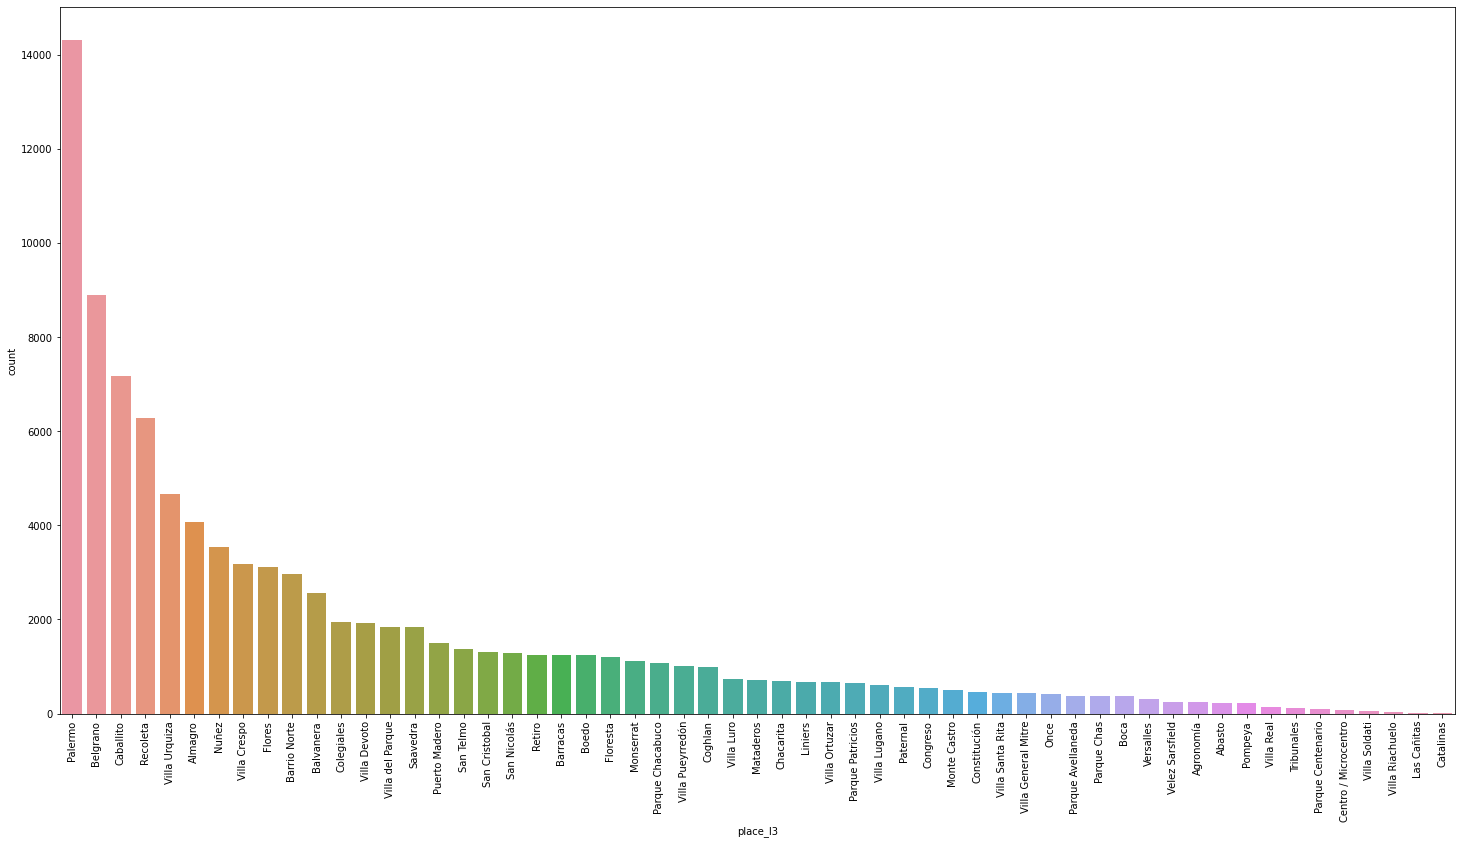

In [98]:
#graficamos barplot de place_l3
plt.figure(figsize=(25, 13))
sns.countplot(x='place_l3', data=ds_propiedades, order=ds_propiedades.place_l3.value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [99]:
ds_propiedades.property_type.value_counts()

Departamento    80829
PH               9266
Casa             4154
Name: property_type, dtype: int64

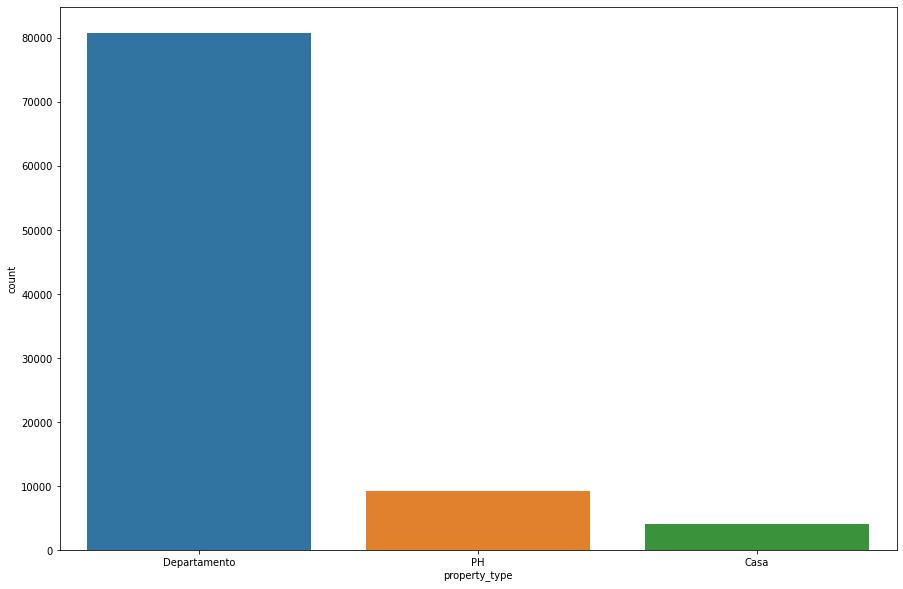

In [105]:
#graficamos barplot de property_types
plt.figure(figsize=(15, 10))
sns.countplot(x='property_type', data=ds_propiedades, order=ds_propiedades.property_type.value_counts().index)

plt.show()

Las variables que percibimos irrelevantes para el análisis fueron: Los Ids ya que no aportan valor al analizarlos y las mencionadas arriba, que decidimos no analizarlas en el caso cualitativo.

In [113]:
ds_propiedades[variables_cuantitativas].corr()

,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
property_rooms,1.000000,0.871940,0.067211,0.076097,0.488934
property_bedrooms,0.871940,1.000000,0.067702,0.075075,0.425386
property_surface_total,0.067211,0.067702,1.000000,0.604311,0.085235
property_surface_covered,0.076097,0.075075,0.604311,1.000000,0.056238
property_price,0.488934,0.425386,0.085235,0.056238,1.000000


Vemos los porcentajes de datos nulos por columna

In [112]:
filas_totales=ds_propiedades.shape[0]
print(ds_propiedades.isna().sum()/filas_totales*100)

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.957602
longitud                      3.957602
place_l2                      0.000000
place_l3                      0.442445
place_l4                     96.134707
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.107704
property_bedrooms            11.657418
property_surface_total        5.139577
property_surface_covered      3.558658
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


Acá podemos ver que las variables "place_l6", "place_l5" y "place_l4" tienen una grandísima cantidad de valores nulos. Por esto decidimos eliminarlas.


In [14]:
# columnas_eliminar_NANs=["place_l6", "place_l5", "place_l4"]
# ds_propiedades.drop(columnas_eliminar_NANs, axis='columns', inplace=True)
# print(f'Columnas restantes: {ds_propiedades.columns.tolist()}')

Columnas restantes: ['id', 'start_date', 'end_date', 'created_on', 'latitud', 'longitud', 'place_l2', 'place_l3', 'operation', 'property_type', 'property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered', 'property_price', 'property_currency', 'property_title']
